#### Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# membaca dataset 
df = pd.read_csv("cancer.csv")

# mengahapus kolom yang tidak digunakan
df.drop(["Unnamed: 32","id"], axis=1, inplace=True)

# merubah label M (ganas) = 1 dan B (jinak) = 0
df.diagnosis = [1 if each == "M" else 0 for each in df['diagnosis']]

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Splitting Data

In [4]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=False)

#### Fitting Model & Predict

In [6]:
#fitting
model = DecisionTreeClassifier().fit(x_train, y_train)

In [7]:
#predict
y_pred = model.predict(x_test)

In [8]:
#try to predict using model
coba = x_test.iloc[:1]
model.predict(coba)

array([1], dtype=int64)

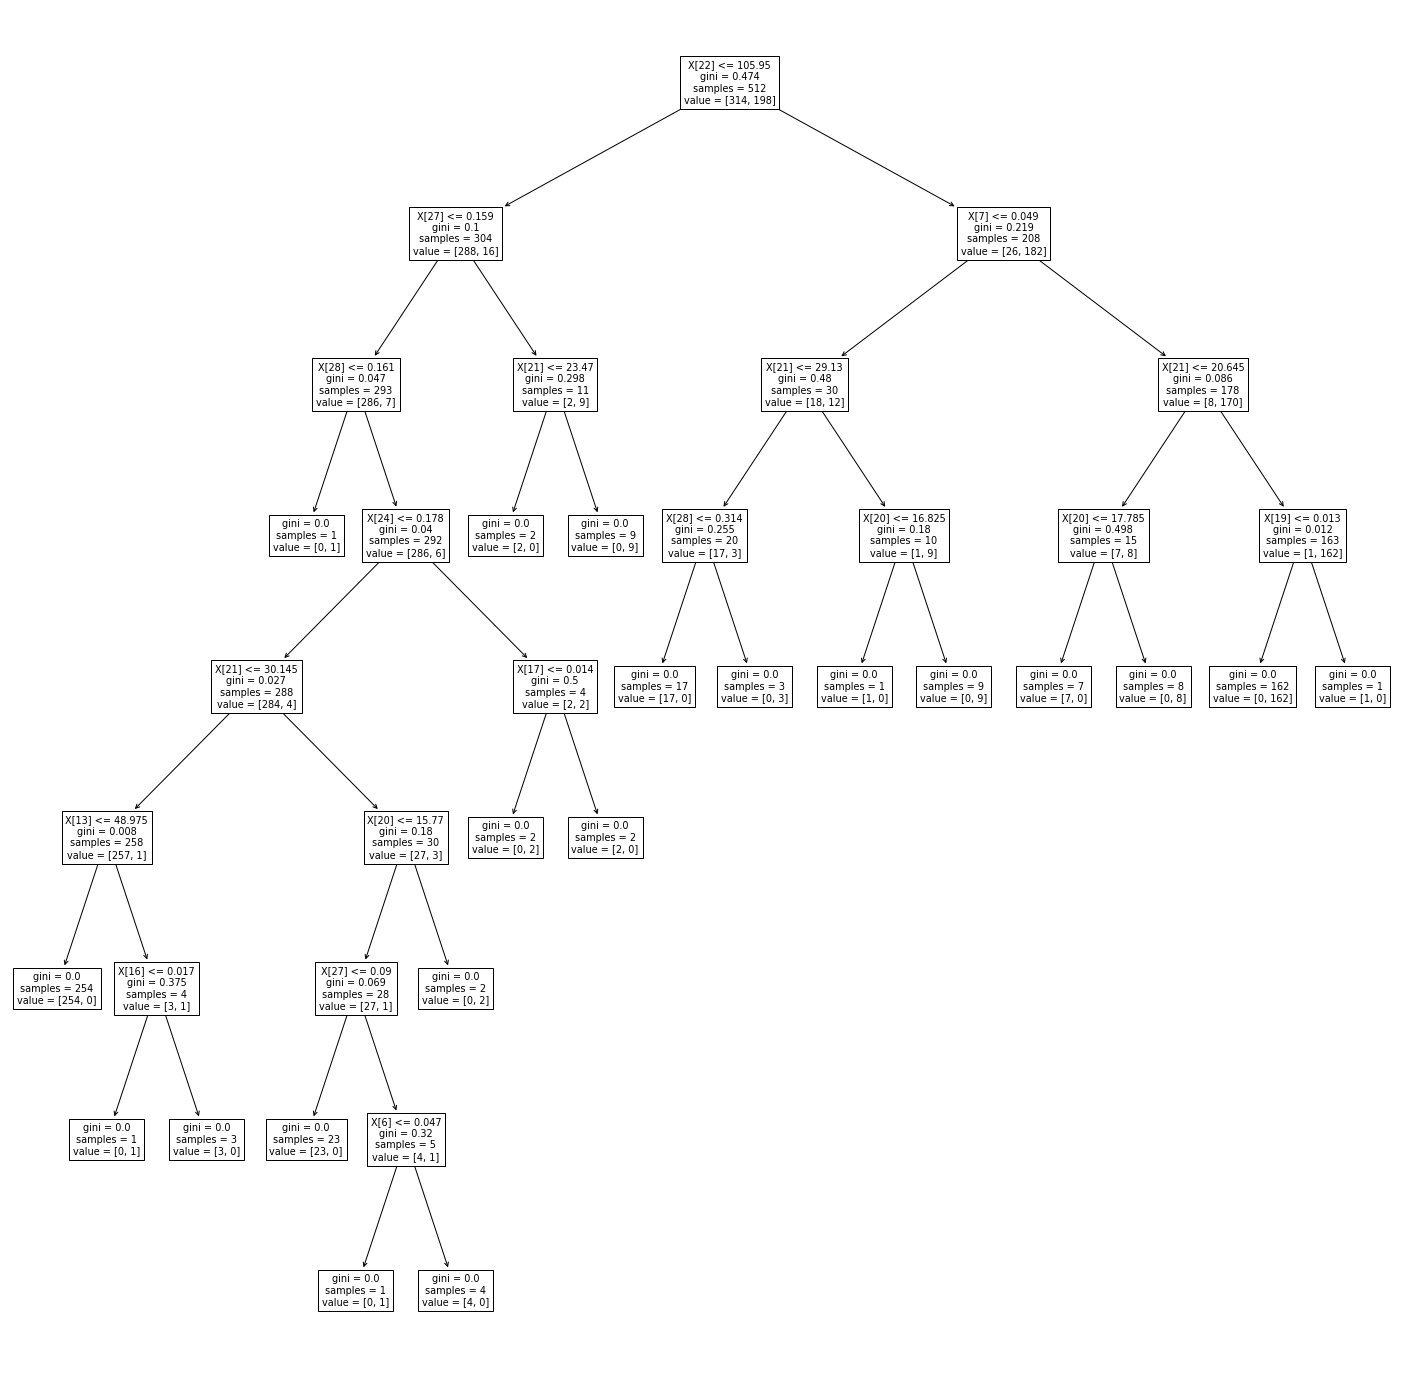

In [9]:
from sklearn import tree

plt.figure(figsize = (25,25))
tree.plot_tree(model.fit(x_train, y_train))
plt.show()

In [10]:
DT_columns = x_train.columns.tolist()
class_name = ['Ganas', 'Jinak']

#### Confusion Matrix

In [12]:
confusion_matrix(y_test, y_pred)

array([[38,  5],
       [ 1, 13]], dtype=int64)

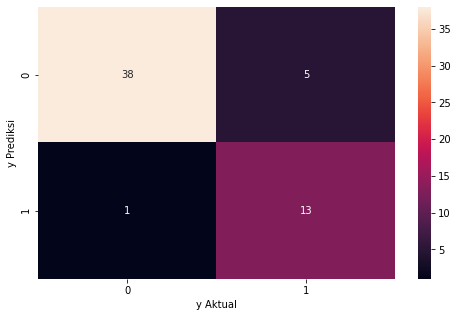

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.72      0.93      0.81        14

    accuracy                           0.89        57
   macro avg       0.85      0.91      0.87        57
weighted avg       0.91      0.89      0.90        57



In [13]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()
print(classification_report(y_test, y_pred))

In [14]:
model.score(x_train, y_train)

1.0

In [15]:
model.score(x_test, y_test)

0.8947368421052632

ROC (Receiver Operating Characteristic) = Membandingkan TP rate dengan 

AUC (Area Under Curve) = 